In [1]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from IPython.display import Image
from moviepy.editor import VideoFileClip
from IPython.display import HTML

import pickle
import io
import os
import glob
%matplotlib inline

## 1.Camera callibration

## 2.Distortion Correction

## 3.Gradient and Color Thresholding


*    Sobel gradients in the x & y directions
*    Gradient magnitude
*    Gradient direction
*    Color space transform and filtering


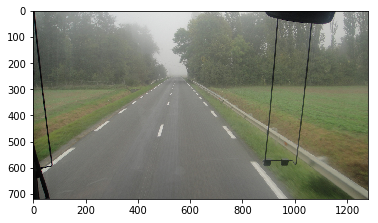

In [95]:
image=mpimg.imread('test_images\DSC02668.jpg')
plt.imshow(image)

* Sobel gradient

Canny Edge Detection combines the sobel gradient for both x and y. By breaking it apart into its components, we can produced a refined version of Canny edge detection.

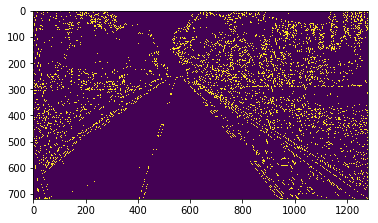

In [99]:
canny=cv2.Canny(image,40,50)
plt.imshow(canny)

In [100]:
def abs_sobel_thresh(img,orient='x',thresh=(0,255)):
    gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    if orient == 'x':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 1, 0))
    if orient == 'y':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 0, 1))
    scaled_sobel=np.uint8(255*abs_sobel/np.max(abs_sobel))
    binary_output=np.zeros_like(scaled_sobel)
    binary_output[(scaled_sobel>=thresh[0]) & (scaled_sobel<=thresh[1])]=1

    return binary_output

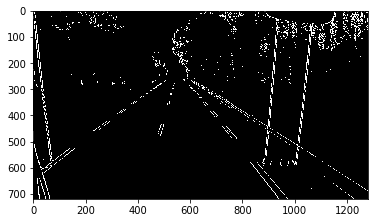

In [101]:
plt.imshow(abs_sobel_thresh(image, thresh=(20,110)),  cmap='gray')

 * Gradient Magnitude
 
The function below will filter based on a min/max magnitude for the gradient. This function is looking at the combined xy gradient, but it could be altered to filter on the magnitude in a single direction, or some linear combination of the two.

In [102]:
def mag_threshold(img,sobel_kernal=3,thresh=(0,255)):
    gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

    x=cv2.Sobel(gray,cv2.CV_64F,1,0,ksize=sobel_kernal)
    y=cv2.Sobel(gray,cv2.CV_64F,0,1,ksize=sobel_kernal)

    mag=np.sqrt(x**2 + y**2)

    scale=np.max(mag)/255
    eightbit=(mag/scale).astype(np.uint8)
    binary_output=np.zeros_like(eightbit)
    binary_output[(eightbit>thresh[0]) & (eightbit<thresh[1])]=1
    return binary_output

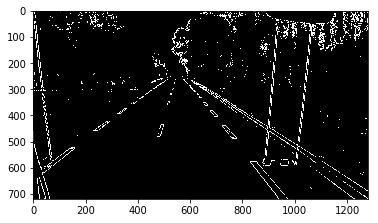

In [103]:
plt.imshow(mag_threshold(image, thresh=(20,100)),  cmap='gray');

* Gradient Direction

This function will filter based on the direction of the gradient. For lane detection, we will be interested in vertical lines that are +/- some threshold near $\frac{\pi}{2}$

In [104]:
def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):
    # 1) Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # 2) Take the gradient in x and y separately
    x = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel))
    y = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel))
    # 4) Use np.arctan2(abs_sobely, abs_sobelx) to calculate the direction of the gradient 
    direction = np.arctan2(y, x)
    binary_output = np.zeros_like(direction)
    binary_output[(direction > thresh[0]) & (direction < thresh[1])] = 1
    return binary_output

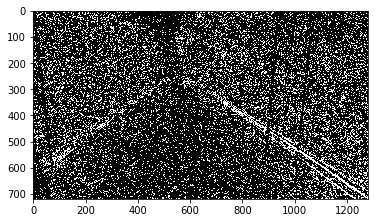

In [105]:
plt.imshow(dir_threshold(image, thresh=(0.8,1.2)),  cmap='gray');

* Saturation Channel & Red Channel Filters
The gradient filters above all convert the original image into grayscale and a lot of useful information is lost. Lane lines are either yellow or white, and we can use that to our advantage trying to locate and track them. The Hue Saturation Lightness color space will help. In particular, the S channel of an HSL image retains a lot information about lane lines - especially when there are shadows on the road. The Red channel of RGB also does a good job of creating binary images of lane lines.

In [106]:
def hls_select(img, sthresh=(0, 255),lthresh=()):
    # 1) Convert to HLS color space
    hls_img = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    # 2) Apply a threshold to the S channel
    L = hls_img[:,:,1]
    S = hls_img[:,:,2]
    # 3) Return a binary image of threshold result
    binary_output = np.zeros_like(S)
    binary_output[(S >= sthresh[0]) & (S <= sthresh[1])
                 & (L > lthresh[0]) & (L <= lthresh[1])] = 1
    return binary_output

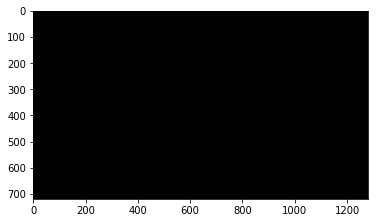

In [107]:
plt.imshow(hls_select(image, sthresh=(140,255), lthresh=(120, 255)),  cmap='gray');

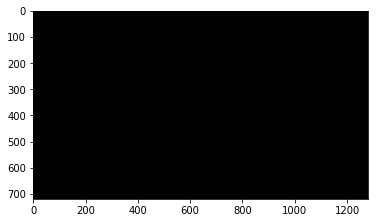

In [108]:
plt.imshow(hls_select(image, sthresh=(120,255), lthresh=(50, 255)),  cmap='gray');

In [109]:
def red_select(img, thresh=(0, 255)):
    # Apply a threshold to the R channel
    R = img[:,:,0]
    # Return a binary image of threshold result
    binary_output = np.zeros_like(R)
    binary_output[(R > thresh[0]) & (R <= thresh[1])] = 1
    return binary_output

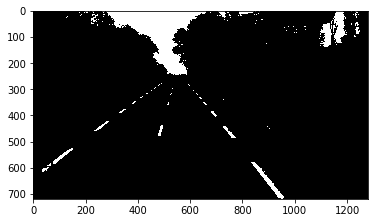

In [115]:
plt.imshow(red_select(image, thresh=(180,255)),  cmap='gray');

## 4.Perspective Transform

## 5.Lane Line Search & Search Optimization

## 6.Drawing the lane overlay